In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os,sys
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import initializers
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import pickle as p
from tensorflow.keras import layers, models
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix 
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

In [ ]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)

In [ ]:
def Upload_Dataset(Dataset_Path):
   
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
   
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            #print(j)
            for k in os.listdir(Path_train_Dataset+"/"+j):
                img=cv2.imread(Path_train_Dataset+"/"+j+"/"+k)
                Input_train_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    print('0 Entered ',j)
                    Output_train.append(int(0))
                elif(j == 'ewer'):
                    print('1 Entered ',j)
                    Output_train.append(int(1))
                elif(j == 'helicopter'):
                    print('2 Entered ',j)
                    Output_train.append(int(2))
                elif(j == 'scorpion'):
                    print('3 Entered ',j)
                    Output_train.append(int(3))
                else:
                    print('4 Entered ',j)
                    Output_train.append(int(4))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                img=cv2.imread(Path_test_Dataset+"/"+j+"/"+k)
                Input_test_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    Output_test.append(int(0))
                elif(j == 'ewer'):
                    Output_test.append(int(1))
                elif(j == 'helicopter'):
                    Output_test.append(int(2))
                elif(j == 'scorpion'):
                    Output_test.append(int(3))
                else:
                    Output_test.append(int(4))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                img=cv2.imread(Path_val_Dataset+"/"+j+"/"+k)
                Input_val_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    Output_val.append(int(0))
                elif(j == 'ewer'):
                    Output_val.append(int(1))
                elif(j == 'helicopter'):
                    Output_val.append(int(2))
                elif(j == 'scorpion'):
                    Output_val.append(int(3))
                else:
                    Output_val.append(int(4))
       
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train)
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val
#providing path of  Caltech-101 dataset
Dataset_Path = "/content/drive/MyDrive/DLA5/Group_1"

In [ ]:
#calling Upload_Dataset function
trainInp, testInp,valInp, trainOut, testOut, valOut= Upload_Dataset(Dataset_Path)

1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
3 Entered  scorpion
3 Entered  scorpion
3 Entered  scorpion
3 Entered  scorpion
3 Entered  scorpion
3 Entered  scorpion
3 Entered  scorpion
3 Entered  scorpion
3 Entered  scorpion
3 Entered  scorpion


In [ ]:
model = models.Sequential()
#First Layer
model.add(layers.Conv2D(8, (11, 11), strides=4,activation='relu', padding='valid',input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((3, 3,), strides=2, padding='valid'))
#Second Layer
model.add(layers.Conv2D(16, (5, 5), strides=1,activation='relu',padding='valid', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((3, 3,), strides=2, padding='valid'))
#3 Layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', name='hiddenLayer'))
#4th layer
model.add(layers.Dense(5, activation='softmax', name='outputLayer'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 54, 54, 8)         2912      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 26, 26, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 22, 22, 16)        3216      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 10, 10, 16)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1600)              0         
                                                                 
 hiddenLayer (Dense)         (None, 128)             

In [ ]:
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#tf.keras.metrics.sparse_categorical_crossentropy(    y_true, y_pred, from_logits=False, axis=-1, ignore_class=None)

In [ ]:
es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x = trainInp, y = trainOut, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valInp,  valOut), validation_batch_size=1)

Epoch 1/10000
8/8 [==============================] - 5s 556ms/step - loss: 71.8161 - accuracy: 0.2200 - val_loss: 6.5847 - val_accuracy: 0.3200
Epoch 2/10000
8/8 [==============================] - 3s 346ms/step - loss: 5.1738 - accuracy: 0.3560 - val_loss: 2.3326 - val_accuracy: 0.2800
Epoch 3/10000
8/8 [==============================] - 2s 309ms/step - loss: 1.6383 - accuracy: 0.3760 - val_loss: 1.7042 - val_accuracy: 0.3400
Epoch 4/10000
8/8 [==============================] - 2s 309ms/step - loss: 1.3495 - accuracy: 0.3680 - val_loss: 1.5128 - val_accuracy: 0.2600
Epoch 5/10000
8/8 [==============================] - 2s 298ms/step - loss: 1.3070 - accuracy: 0.3760 - val_loss: 1.5316 - val_accuracy: 0.3000
Epoch 6/10000
8/8 [==============================] - 4s 488ms/step - loss: 1.2490 - accuracy: 0.4280 - val_loss: 1.5316 - val_accuracy: 0.3400
Epoch 7/10000
8/8 [==============================] - 3s 385ms/step - loss: 1.2074 - accuracy: 0.4400 - val_loss: 1.7631 - val_accuracy: 0.320

In [ ]:
model.save('/content/drive/MyDrive/DLA5/a1.h5')
f=open('/content/drive/MyDrive/DLA4/Histae32.pckl','wb')
p.dump(history.history,f)
f.close()

In [ ]:
'''Dataset used for prediction and evaluation  data'''
trainEncode=model.predict(trainInp)
valEncode=model.predict(valInp)
testEncode=model.predict(testInp)

4/4 [==============================] - 0s 70ms/step


In [ ]:
print('\nEvaluation of model on train data:')
trainAcc=model.evaluate(x=trainInp,y=trainOut,batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(trainAcc)

print('\nEvaluation of model on validation data:')
valAcc=model.evaluate(x=valInp, y=valOut, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(valAcc)

print('\nEvaluation of model on test data:')
testAcc=model.evaluate(x=testInp, y=testOut, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(testAcc)

print('\nPredictions for test data:')
testProb=model.predict(testInp, batch_size=1, verbose="auto", callbacks=None)
pred=np.argmax(testProb,axis=1)
print(pred)

'''3-3'''
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix=confusion_matrix(testOut,pred)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix)



Evaluation of model on train data:
250/250 [==============================] - 2s 8ms/step - loss: 0.8845 - accuracy: 0.5960
['loss', 'accuracy']
[0.884490966796875, 0.5960000157356262]

Evaluation of model on validation data:
50/50 [==============================] - 0s 8ms/step - loss: 3.1401 - accuracy: 0.3400
['loss', 'accuracy']
[3.1400694847106934, 0.3400000035762787]

Evaluation of model on test data:
100/100 [==============================] - 1s 6ms/step - loss: 3.6910 - accuracy: 0.3300
['loss', 'accuracy']
[3.6909561157226562, 0.33000001311302185]

Predictions for test data:
100/100 [==============================] - 1s 5ms/step
[2 4 2 1 2 2 0 1 1 2 2 2 2 2 2 2 2 4 2 1 0 2 2 3 1 3 2 4 2 4 3 3 2 2 2 1 2
 2 0 1 0 0 0 4 2 2 2 1 2 2 0 0 2 3 0 2 1 1 0 2 4 2 2 2 4 4 4 2 2 2 2 2 2 2
 2 1 2 2 4 0 2 2 2 2 2 4 2 1 2 2 0 4 2 2 3 2 4 3 2 2]
[[ 7  3  8  1  1]
 [ 1  4 13  0  2]
 [ 1  1 13  2  3]
 [ 2  3  9  4  2]
 [ 1  1 13  0  5]]


In [ ]:
layer = model.layers #Conv layers at 0, 2
filters, biases = model.layers[2].get_weights()
print(layer[2].name, filters.shape)

conv2d_20 (5, 5, 8, 16)


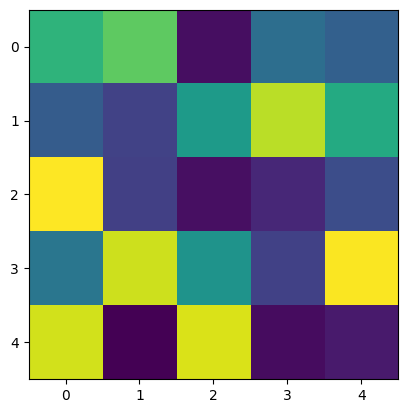

In [ ]:
for i in range(16):
    f = filters[:, :, :, i]
    plt.imshow(f[:, :, 0])


In [ ]:
conv_layer_index = [0] #[0, 1]
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19_input (InputLayer  [(None, 224, 224, 3)]    0         
 )                                                               
                                                                 
 conv2d_19 (Conv2D)          (None, 54, 54, 8)         2912      
                                                                 
Total params: 2,912
Trainable params: 2,912
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [ ]:
img = load_img('/content/drive/MyDrive/DLA5/Group_1/train/brain/image_0001.jpg', target_size=(224, 224))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
feature_output = model_short.predict(img)

1/1 [==============================] - 0s 75ms/step


In [ ]:
# Plot the feature maps for the remaining convolutional layers
for j, layer_name in enumerate(layer_names[1:]):
    for i in range(8):
        plt.imshow(feature_output[ 0, :, :, i])
    plt.show()


In [ ]:
layer_names = [layer.name for layer in model.layers]
layer_names

['conv2d_19',
 'max_pooling2d_19',
 'conv2d_20',
 'max_pooling2d_20',
 'flatten_8',
 'hiddenLayer',
 'outputLayer']

In [ ]:
# Plot the feature maps for the remaining convolutional layers
for j, layer_name in enumerate(layer_names[1:]):
    for i in range(8):
        plt.imshow(feature_output[ 0::, :, i])
    plt.show()

In [ ]:
img = load_img('/content/drive/MyDrive/DLA5/Group_1/train/brain/image_0001.jpg', target_size=(224, 224))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
feature_output = model_short.predict(img)
for ftr in feature_output:
    for i in range(8):
        plt.imshow(ftr[:, :, i]) #ftr[0, :, :, i]

layer_names = [layer.name for layer in model.layers]
layer_names

# Plot the feature maps for the remaining convolutional layers
for j, layer_name in enumerate(layer_names[1:]):
    for i in range(8):
        plt.imshow(feature_output[ 0, :, :, i])
    plt.show()